In [1]:
import scipy.stats as st
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import normalize
import matplotlib.pyplot as plt
import pandas as pd

from sklearn.metrics import r2_score
import seaborn as sns

from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm

import itertools as it
from tqdm import tqdm

In [34]:
# variance_inflation_factor(X.reshape(1, -1), 2)

# Task 1

# a)

In [110]:
n = 100

X = st.uniform.rvs(size=n)
eps = st.expon.rvs(scale=10, size=n)

Y = X * eps

x = X.reshape(-1, 1)
x = sm.add_constant(x)

reg = sm.OLS(Y, x).fit()


residuals = reg.resid
fitted_value = reg.fittedvalues
stand_resids = reg.resid_pearson
influence = reg.get_influence()
leverage = influence.hat_matrix_diag

In [111]:
reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.234
Model:                            OLS   Adj. R-squared:                  0.226
Method:                 Least Squares   F-statistic:                     29.86
Date:                Sat, 01 Apr 2023   Prob (F-statistic):           3.53e-07
Time:                        15:31:58   Log-Likelihood:                -306.67
No. Observations:                 100   AIC:                             617.3
Df Residuals:                      98   BIC:                             622.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2894      1.054      0.275      0.784      -1.802       2.380
x1            10.2102      1.869      5.464      0.000       6.502      13.918
==============================================================================
Omnibus:                       43.335   Durbin-Watson:                   1.954
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               94.229
Skew:                           1.712   Prob(JB):                     3.45e-21
Kurtosis:                       6.299   Cond. No.                         4.47
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

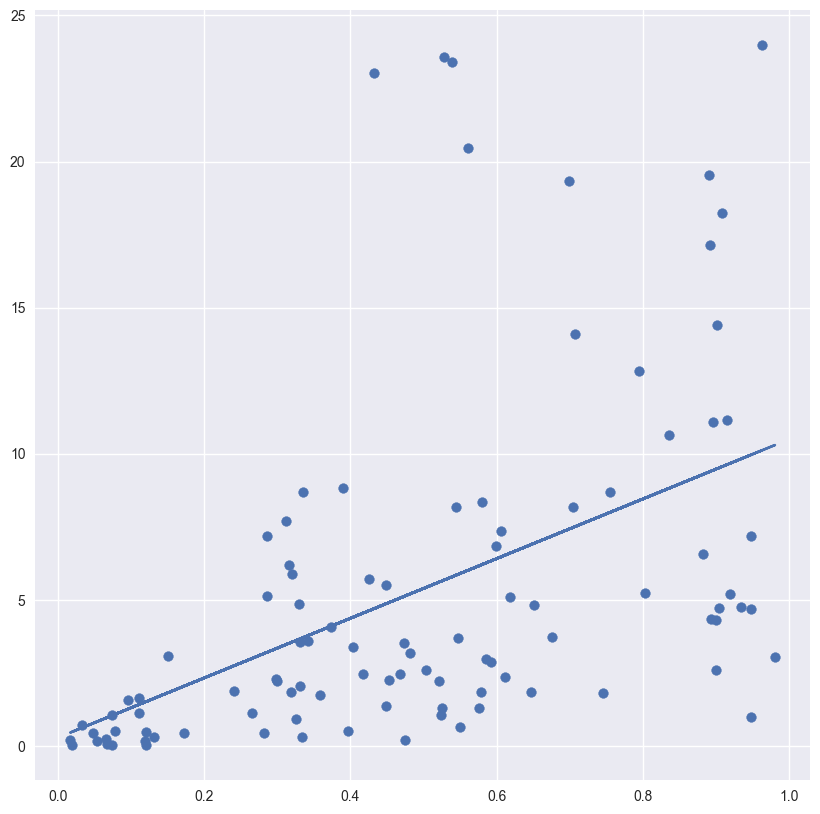

In [112]:
plt.plot(X, reg.predict())
plt.scatter(X, Y)

Text(0.5, 1.0, 'Scale-location')

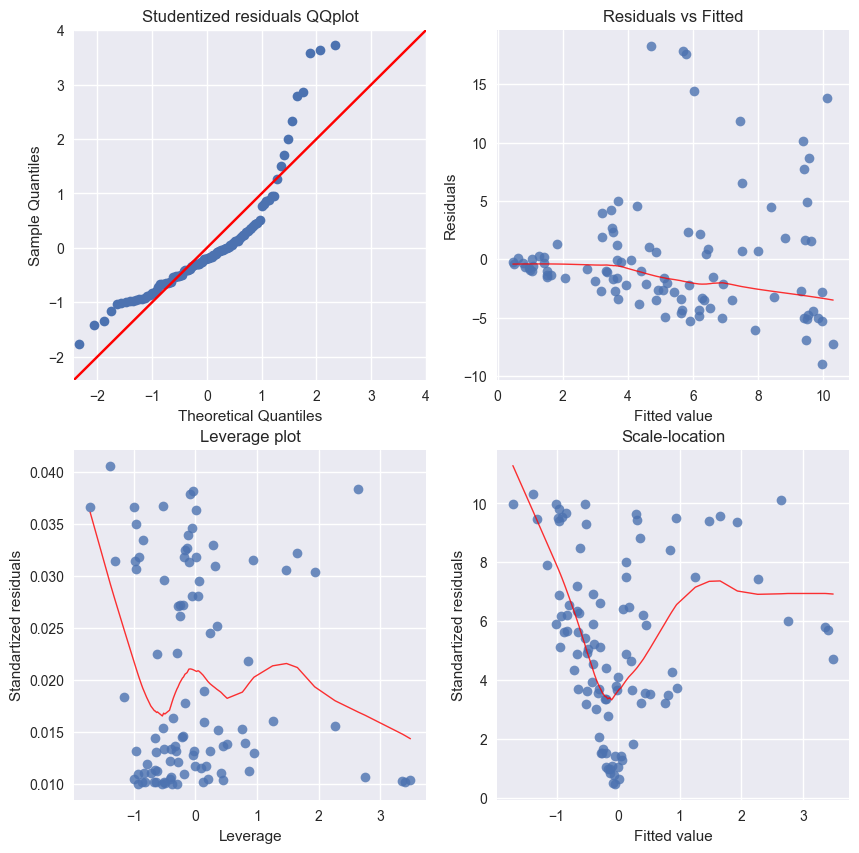

In [113]:
plt.rcParams["figure.figsize"] = (10, 10)
fig, ax = plt.subplots(nrows=2, ncols=2)


sm.qqplot(reg.outlier_test().T[0], line='45', ax=ax[0, 0])
ax[0, 0].set_title('Studentized residuals QQplot')


# Residuals vs Fitted
sns.regplot(x=fitted_value, y=residuals,
              scatter=True,
              lowess=True,
              line_kws={'color': 'red', 'lw': 1, 'alpha': 0.8},
              ax=ax[0, 1])
ax[0, 1].set_ylabel("Residuals")
ax[0, 1].set_xlabel("Fitted value")
ax[0, 1].set_title('Residuals vs Fitted')


sns.regplot(x=stand_resids, y=leverage,
              scatter=True,
              lowess=True,
              line_kws={'color': 'red', 'lw': 1, 'alpha': 0.8},
              ax=ax[1, 0])
ax[1, 0].set_ylabel("Standartized residuals")
ax[1, 0].set_xlabel("Leverage")
ax[1, 0].set_title('Leverage plot')

sns.regplot(x=stand_resids, y=fitted_value,
              scatter=True,
              lowess=True,
              line_kws={'color': 'red', 'lw': 1, 'alpha': 0.8},
              ax=ax[1, 1])
ax[1, 1].set_ylabel("Standartized residuals")
ax[1, 1].set_xlabel("Fitted value")
ax[1, 1].set_title('Scale-location')

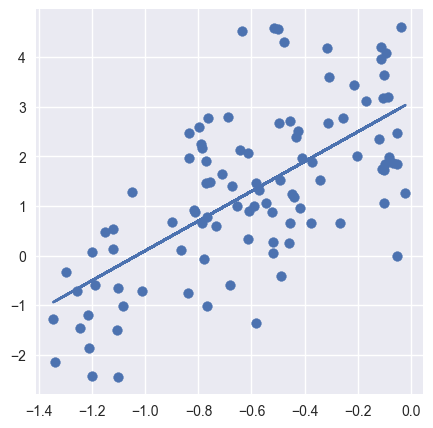

In [163]:
Y_= st.boxcox(Y)[0]
X_= st.boxcox(X)[0]
x = X_.reshape(-1, 1)
x = sm.add_constant(x)

reg = sm.OLS(Y_, x).fit()

plt.figure(figsize=(5,5))
plt.scatter(X_, Y_)
plt.plot(X_, reg.fittedvalues)
plt.show()

residuals = reg.resid
fitted_value = reg.fittedvalues
stand_resids = reg.resid_pearson
influence = reg.get_influence()
leverage = influence.hat_matrix_diag


In [159]:
reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.437
Model:                            OLS   Adj. R-squared:                  0.431
Method:                 Least Squares   F-statistic:                     75.91
Date:                Sat, 01 Apr 2023   Prob (F-statistic):           7.47e-14
Time:                        15:47:44   Log-Likelihood:                -164.58
No. Observations:                 100   AIC:                             333.2
Df Residuals:                      98   BIC:                             338.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.0909      0.242     12.770      0.000       2.611       3.571
x1             2.9925      0.343      8.713      0.000       2.311       3.674
==============================================================================
Omnibus:                        1.203   Durbin-Watson:                   1.916
Prob(Omnibus):                  0.548   Jarque-Bera (JB):                1.149
Skew:                           0.255   Prob(JB):                        0.563
Kurtosis:                       2.879   Cond. No.                         3.79
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Text(0.5, 1.0, 'Scale-location')

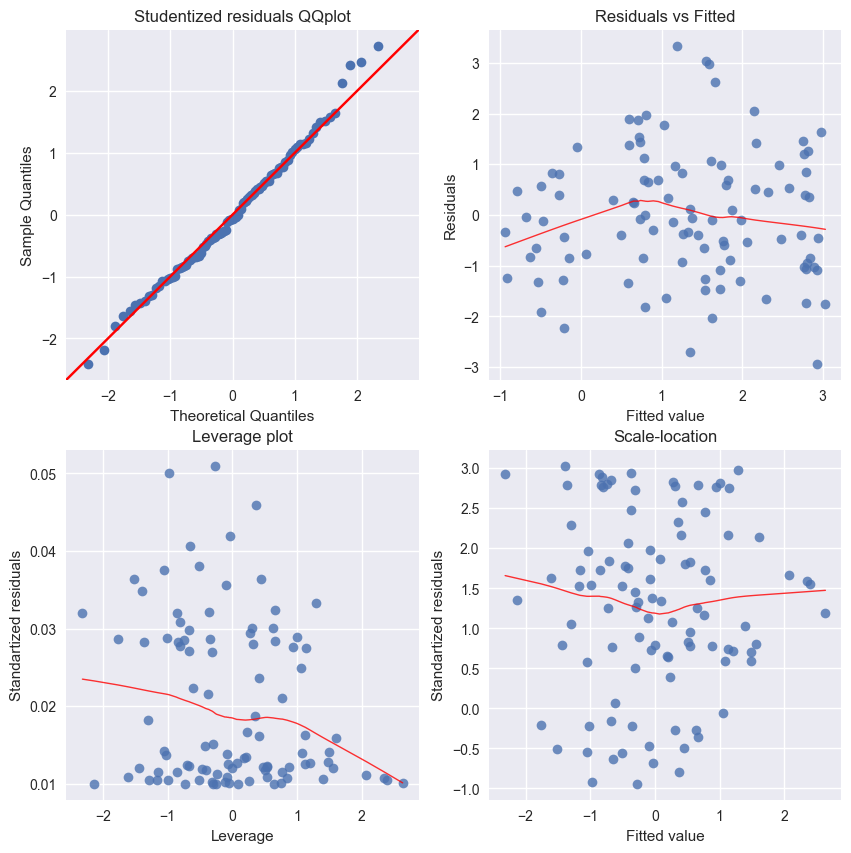

In [160]:
plt.rcParams["figure.figsize"] = (10, 10)
fig, ax = plt.subplots(nrows=2, ncols=2)


sm.qqplot(reg.outlier_test().T[0], line='45', ax=ax[0, 0])
ax[0, 0].set_title('Studentized residuals QQplot')


# Residuals vs Fitted
sns.regplot(x=fitted_value, y=residuals,
              scatter=True,
              lowess=True,
              line_kws={'color': 'red', 'lw': 1, 'alpha': 0.8},
              ax=ax[0, 1])
ax[0, 1].set_ylabel("Residuals")
ax[0, 1].set_xlabel("Fitted value")
ax[0, 1].set_title('Residuals vs Fitted')


sns.regplot(x=stand_resids, y=leverage,
              scatter=True,
              lowess=True,
              line_kws={'color': 'red', 'lw': 1, 'alpha': 0.8},
              ax=ax[1, 0])
ax[1, 0].set_ylabel("Standartized residuals")
ax[1, 0].set_xlabel("Leverage")
ax[1, 0].set_title('Leverage plot')

sns.regplot(x=stand_resids, y=fitted_value,
              scatter=True,
              lowess=True,
              line_kws={'color': 'red', 'lw': 1, 'alpha': 0.8},
              ax=ax[1, 1])
ax[1, 1].set_ylabel("Standartized residuals")
ax[1, 1].set_xlabel("Fitted value")
ax[1, 1].set_title('Scale-location')

# b)

In [164]:
n = 100


X2 = st.uniform.rvs(size=n)
X1 = st.expon.rvs(size=n)

eps = st.norm.rvs(size=n, scale=0.5**0.5)

Y = (2 * np.log(X1) + X2**3 + 3 + eps)**0.5


X1 = X1[~np.isnan(Y)]
X2 = X2[~np.isnan(Y)]
eps = eps[~np.isnan(Y)]
Y = Y[~np.isnan(Y)]

x = np.stack([X1, X2], axis=1)

x = sm.add_constant(x)

reg = sm.OLS(Y, x).fit()


residuals = reg.resid
fitted_value = reg.fittedvalues
stand_resids = reg.resid_pearson
influence = reg.get_influence()
leverage = influence.hat_matrix_diag


/var/folders/cf/r4p_4hn136zchblr7g63k6700000gn/T/ipykernel_14160/1778467720.py:9: RuntimeWarning: invalid value encountered in sqrt
  Y = (2 * np.log(X1) + X2**3 + 3 + eps)**0.5


In [165]:
reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.574
Model:                            OLS   Adj. R-squared:                  0.561
Method:                 Least Squares   F-statistic:                     45.10
Date:                Sat, 01 Apr 2023   Prob (F-statistic):           3.92e-13
Time:                        15:49:40   Log-Likelihood:                -25.867
No. Observations:                  70   AIC:                             57.73
Df Residuals:                      67   BIC:                             64.48
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.1182      0.112      9.950      0.000       0.894       1.342
x1             0.4433      0.047      9.468      0.000       0.350       0.537
x2             0.0554      0.154      0.359      0.721      -0.253       0.364
==============================================================================
Omnibus:                       10.177   Durbin-Watson:                   2.224
Prob(Omnibus):                  0.006   Jarque-Bera (JB):               10.422
Skew:                          -0.932   Prob(JB):                      0.00546
Kurtosis:                       3.319   Cond. No.                         7.58
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Text(0.5, 1.0, 'Scale-location')

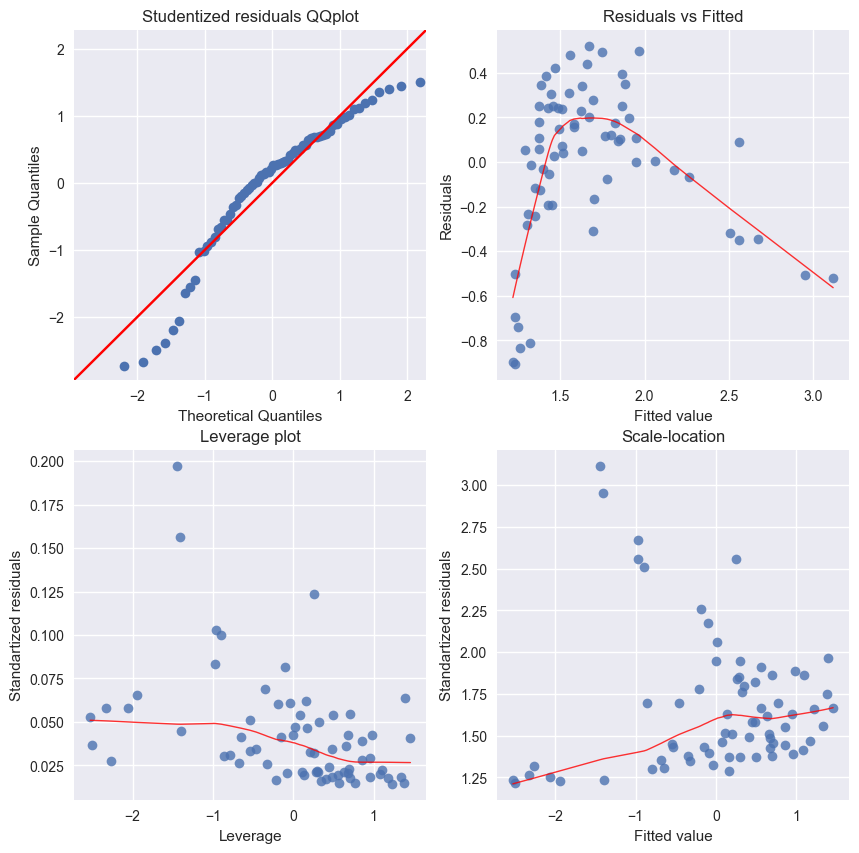

In [166]:
plt.rcParams["figure.figsize"] = (10, 10)
fig, ax = plt.subplots(nrows=2, ncols=2)


sm.qqplot(reg.outlier_test().T[0], line='45', ax=ax[0, 0])
ax[0, 0].set_title('Studentized residuals QQplot')


# Residuals vs Fitted
sns.regplot(x=fitted_value, y=residuals,
              scatter=True,
              lowess=True,
              line_kws={'color': 'red', 'lw': 1, 'alpha': 0.8},
              ax=ax[0, 1])
ax[0, 1].set_ylabel("Residuals")
ax[0, 1].set_xlabel("Fitted value")
ax[0, 1].set_title('Residuals vs Fitted')


sns.regplot(x=stand_resids, y=leverage,
              scatter=True,
              lowess=True,
              line_kws={'color': 'red', 'lw': 1, 'alpha': 0.8},
              ax=ax[1, 0])
ax[1, 0].set_ylabel("Standartized residuals")
ax[1, 0].set_xlabel("Leverage")
ax[1, 0].set_title('Leverage plot')

sns.regplot(x=stand_resids, y=fitted_value,
              scatter=True,
              lowess=True,
              line_kws={'color': 'red', 'lw': 1, 'alpha': 0.8},
              ax=ax[1, 1])
ax[1, 1].set_ylabel("Standartized residuals")
ax[1, 1].set_xlabel("Fitted value")
ax[1, 1].set_title('Scale-location')

-0.7740150971447832 0.7861709215299918 1.6162316774298329


Text(0.5, 1.0, 'Scale-location')

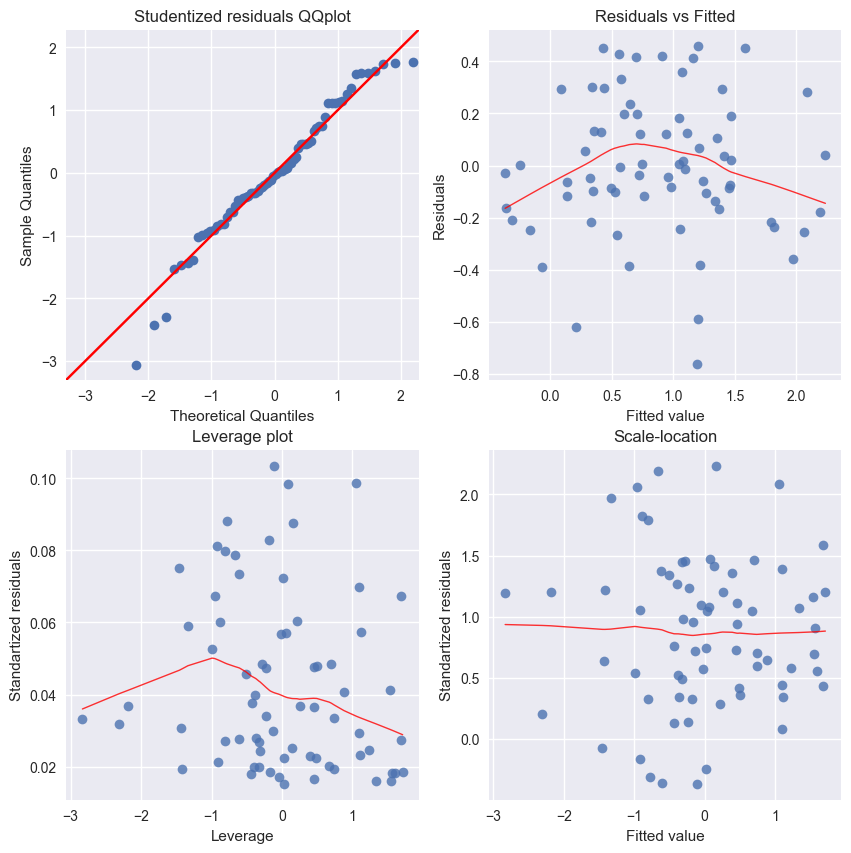

In [192]:
X1_ = st.boxcox(X1)[0]
X2_ = st.boxcox(X2)[0]
Y_ = st.boxcox(Y)[0]

print(l1, l2, ly)

x = np.stack([X1_, X2_], axis=1)

x = sm.add_constant(x)

reg = sm.OLS(Y_, x).fit()


residuals = reg.resid
fitted_value = reg.fittedvalues
stand_resids = reg.resid_pearson
influence = reg.get_influence()
leverage = influence.hat_matrix_diag

plt.rcParams["figure.figsize"] = (10, 10)
fig, ax = plt.subplots(nrows=2, ncols=2)


sm.qqplot(reg.outlier_test().T[0], line='45', ax=ax[0, 0])
ax[0, 0].set_title('Studentized residuals QQplot')


# Residuals vs Fitted
sns.regplot(x=fitted_value, y=residuals,
              scatter=True,
              lowess=True,
              line_kws={'color': 'red', 'lw': 1, 'alpha': 0.8},
              ax=ax[0, 1])
ax[0, 1].set_ylabel("Residuals")
ax[0, 1].set_xlabel("Fitted value")
ax[0, 1].set_title('Residuals vs Fitted')


sns.regplot(x=stand_resids, y=leverage,
              scatter=True,
              lowess=True,
              line_kws={'color': 'red', 'lw': 1, 'alpha': 0.8},
              ax=ax[1, 0])
ax[1, 0].set_ylabel("Standartized residuals")
ax[1, 0].set_xlabel("Leverage")
ax[1, 0].set_title('Leverage plot')

sns.regplot(x=stand_resids, y=fitted_value,
              scatter=True,
              lowess=True,
              line_kws={'color': 'red', 'lw': 1, 'alpha': 0.8},
              ax=ax[1, 1])
ax[1, 1].set_ylabel("Standartized residuals")
ax[1, 1].set_xlabel("Fitted value")
ax[1, 1].set_title('Scale-location')


In [193]:
reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.848
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     186.3
Date:                Sat, 01 Apr 2023   Prob (F-statistic):           4.25e-28
Time:                        16:01:37   Log-Likelihood:                -5.8141
No. Observations:                  70   AIC:                             17.63
Df Residuals:                      67   BIC:                             24.37
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.0941      0.061     18.028      0.000       0.973       1.215
x1             0.8167      0.042     19.304      0.000       0.732       0.901
x2             0.2900      0.096      3.007      0.004       0.098       0.482
==============================================================================
Omnibus:                        1.634   Durbin-Watson:                   2.584
Prob(Omnibus):                  0.442   Jarque-Bera (JB):                1.171
Skew:                          -0.311   Prob(JB):                        0.557
Kurtosis:                       3.120   Cond. No.                         3.95
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# c)

In [194]:
n = 100

X = st.uniform.rvs(loc=-4*np.pi, scale=8 * np.pi, size=n)
eps = st.norm.rvs(scale=0.1**0.5, size=n)

Y = np.sin(X) + eps

x = X.reshape(-1, 1)
x = sm.add_constant(x)

reg = sm.OLS(Y, x).fit()


residuals = reg.resid
fitted_value = reg.fittedvalues
stand_resids = reg.resid_pearson
influence = reg.get_influence()
leverage = influence.hat_matrix_diag

In [195]:
reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.013
Model:                            OLS   Adj. R-squared:                  0.003
Method:                 Least Squares   F-statistic:                     1.275
Date:                Sat, 01 Apr 2023   Prob (F-statistic):              0.262
Time:                        16:02:33   Log-Likelihood:                -120.51
No. Observations:                 100   AIC:                             245.0
Df Residuals:                      98   BIC:                             250.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1357      0.082      1.649      0.102      -0.028       0.299
x1            -0.0129      0.011     -1.129      0.262      -0.035       0.010
==============================================================================
Omnibus:                       27.943   Durbin-Watson:                   2.239
Prob(Omnibus):                  0.000   Jarque-Bera (JB):                6.354
Skew:                          -0.222   Prob(JB):                       0.0417
Kurtosis:                       1.848   Cond. No.                         7.30
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

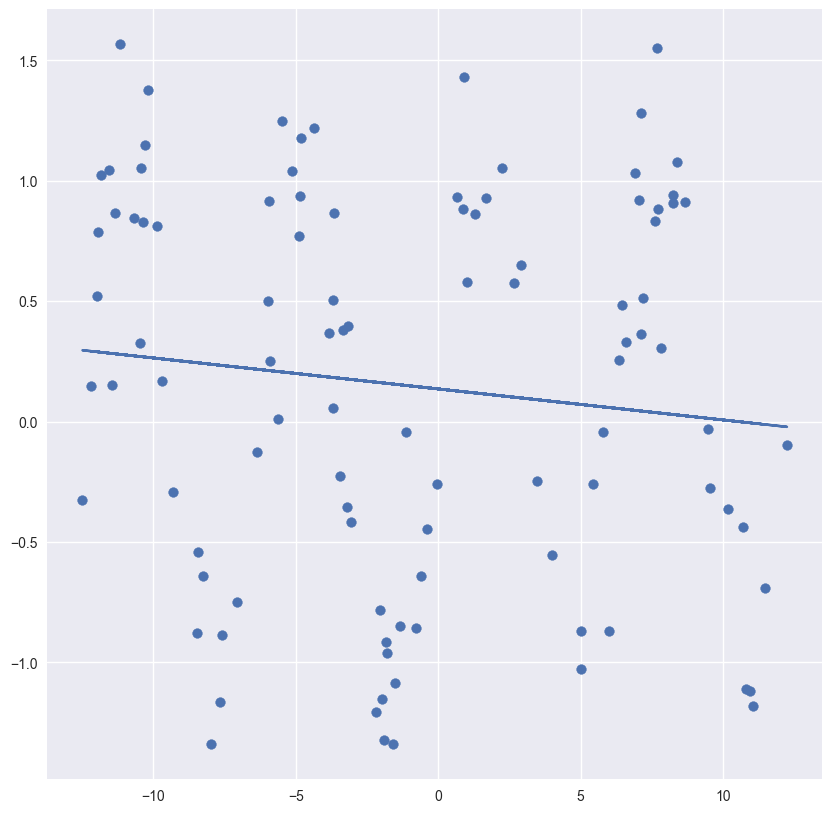

In [196]:
plt.plot(X, reg.predict())
plt.scatter(X, Y)

Text(0.5, 1.0, 'Scale-location')

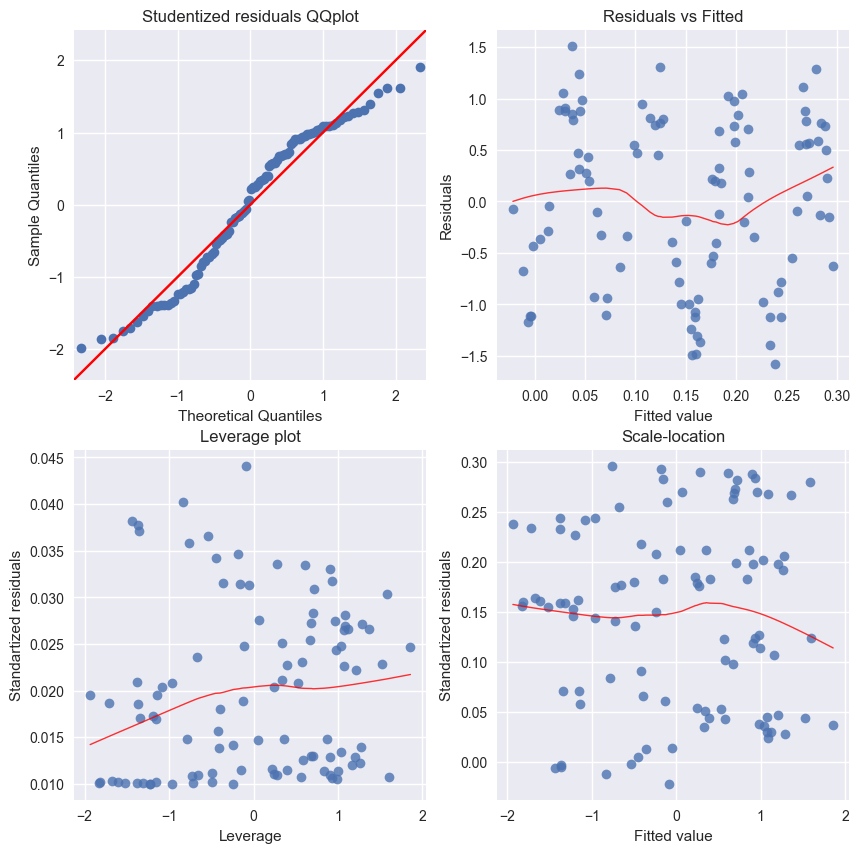

In [197]:
plt.rcParams["figure.figsize"] = (10, 10)
fig, ax = plt.subplots(nrows=2, ncols=2)


sm.qqplot(reg.outlier_test().T[0], line='45', ax=ax[0, 0])
ax[0, 0].set_title('Studentized residuals QQplot')


# Residuals vs Fitted
sns.regplot(x=fitted_value, y=residuals,
              scatter=True,
              lowess=True,
              line_kws={'color': 'red', 'lw': 1, 'alpha': 0.8},
              ax=ax[0, 1])
ax[0, 1].set_ylabel("Residuals")
ax[0, 1].set_xlabel("Fitted value")
ax[0, 1].set_title('Residuals vs Fitted')


sns.regplot(x=stand_resids, y=leverage,
              scatter=True,
              lowess=True,
              line_kws={'color': 'red', 'lw': 1, 'alpha': 0.8},
              ax=ax[1, 0])
ax[1, 0].set_ylabel("Standartized residuals")
ax[1, 0].set_xlabel("Leverage")
ax[1, 0].set_title('Leverage plot')

sns.regplot(x=stand_resids, y=fitted_value,
              scatter=True,
              lowess=True,
              line_kws={'color': 'red', 'lw': 1, 'alpha': 0.8},
              ax=ax[1, 1])
ax[1, 1].set_ylabel("Standartized residuals")
ax[1, 1].set_xlabel("Fitted value")
ax[1, 1].set_title('Scale-location')

Text(0.5, 1.0, 'Scale-location')

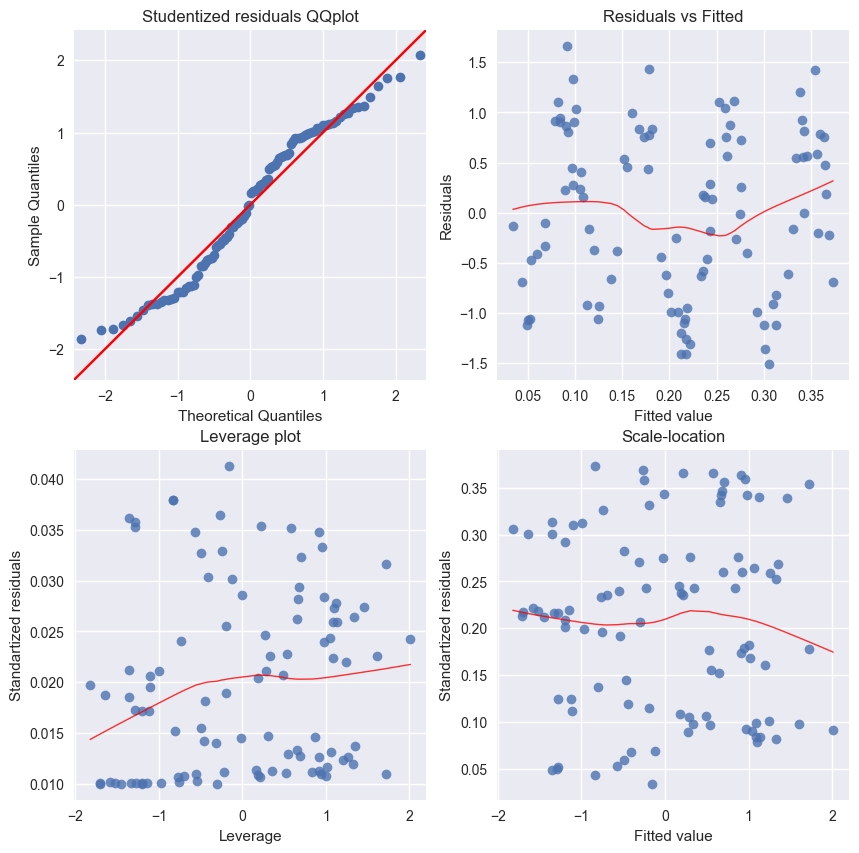

In [207]:
X_ = st.yeojohnson(X)[0]
Y_ = st.yeojohnson(Y)[0]



x = X_.reshape(-1, 1)

x = sm.add_constant(x)

reg = sm.OLS(Y_, x).fit()


residuals = reg.resid
fitted_value = reg.fittedvalues
stand_resids = reg.resid_pearson
influence = reg.get_influence()
leverage = influence.hat_matrix_diag

plt.rcParams["figure.figsize"] = (10, 10)
fig, ax = plt.subplots(nrows=2, ncols=2)


sm.qqplot(reg.outlier_test().T[0], line='45', ax=ax[0, 0])
ax[0, 0].set_title('Studentized residuals QQplot')


# Residuals vs Fitted
sns.regplot(x=fitted_value, y=residuals,
              scatter=True,
              lowess=True,
              line_kws={'color': 'red', 'lw': 1, 'alpha': 0.8},
              ax=ax[0, 1])
ax[0, 1].set_ylabel("Residuals")
ax[0, 1].set_xlabel("Fitted value")
ax[0, 1].set_title('Residuals vs Fitted')


sns.regplot(x=stand_resids, y=leverage,
              scatter=True,
              lowess=True,
              line_kws={'color': 'red', 'lw': 1, 'alpha': 0.8},
              ax=ax[1, 0])
ax[1, 0].set_ylabel("Standartized residuals")
ax[1, 0].set_xlabel("Leverage")
ax[1, 0].set_title('Leverage plot')

sns.regplot(x=stand_resids, y=fitted_value,
              scatter=True,
              lowess=True,
              line_kws={'color': 'red', 'lw': 1, 'alpha': 0.8},
              ax=ax[1, 1])
ax[1, 1].set_ylabel("Standartized residuals")
ax[1, 1].set_xlabel("Fitted value")
ax[1, 1].set_title('Scale-location')


In [208]:
reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.014
Model:                            OLS   Adj. R-squared:                  0.004
Method:                 Least Squares   F-statistic:                     1.418
Date:                Sat, 01 Apr 2023   Prob (F-statistic):              0.237
Time:                        16:04:45   Log-Likelihood:                -122.07
No. Observations:                 100   AIC:                             248.1
Df Residuals:                      98   BIC:                             253.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1906      0.084      2.262      0.026       0.023       0.358
x1            -0.0137      0.011     -1.191      0.237      -0.036       0.009
==============================================================================
Omnibus:                       31.062   Durbin-Watson:                   2.247
Prob(Omnibus):                  0.000   Jarque-Bera (JB):                5.907
Skew:                          -0.070   Prob(JB):                       0.0522
Kurtosis:                       1.818   Cond. No.                         7.47
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# Task 2

In [2]:
df = pd.read_csv('./datasets/Asia.txt', sep='\t')
df.head()

,Country,Area,Population,Life,GDP,GDP/caput
0,Australia,7686850,18322231,77.78,374.6,20720
1,Bangladesh,144000,128094948,55.46,130.1,1040
2,Bhutan,47000,1780638,51.03,1.2,700
3,Brunei,5770,292266,71.24,4.4,16000
4,Burma(Myanma),678500,45103809,60.47,41.4,930


In [3]:
Y = df.Population

x = df[['Area', 'Life', 'GDP', 'GDP/caput']]
x = sm.add_constant(x)

reg = sm.OLS(Y, x).fit()


residuals = reg.resid
fitted_value = reg.fittedvalues
stand_resids = reg.resid_pearson
influence = reg.get_influence()
leverage = influence.hat_matrix_diag

In [4]:
reg.params

const        7.517524e+07
Area         4.623779e+01
Life        -2.776901e+04
GDP          2.159907e+05
GDP/caput   -1.197324e+04
dtype: float64

In [5]:
reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             Population   R-squared:                       0.775
Model:                            OLS   Adj. R-squared:                  0.730
Method:                 Least Squares   F-statistic:                     17.19
Date:                Sat, 22 Apr 2023   Prob (F-statistic):           2.95e-06
Time:                        15:20:39   Log-Likelihood:                -503.56
No. Observations:                  25   AIC:                             1017.
Df Residuals:                      20   BIC:                             1023.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       7.518e+07   3.19e+08      0.236      0.816    -5.9e+08    7.41e+08
Area          46.2378     16.500      2.802      0.011      11.820      80.656
Life       -2.777e+04   5.34e+06     -0.005      0.996   -1.12e+07    1.11e+07
GDP          2.16e+05   5.28e+04      4.088      0.001    1.06e+05    3.26e+05
GDP/caput  -1.197e+04   6492.459     -1.844      0.080   -2.55e+04    1569.790
==============================================================================
Omnibus:                       14.534   Durbin-Watson:                   1.504
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               18.535
Skew:                           1.179   Prob(JB):                     9.45e-05
Kurtosis:                       6.498   Cond. No.                     2.73e+07
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.73e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Text(0.5, 1.0, 'Scale-location')

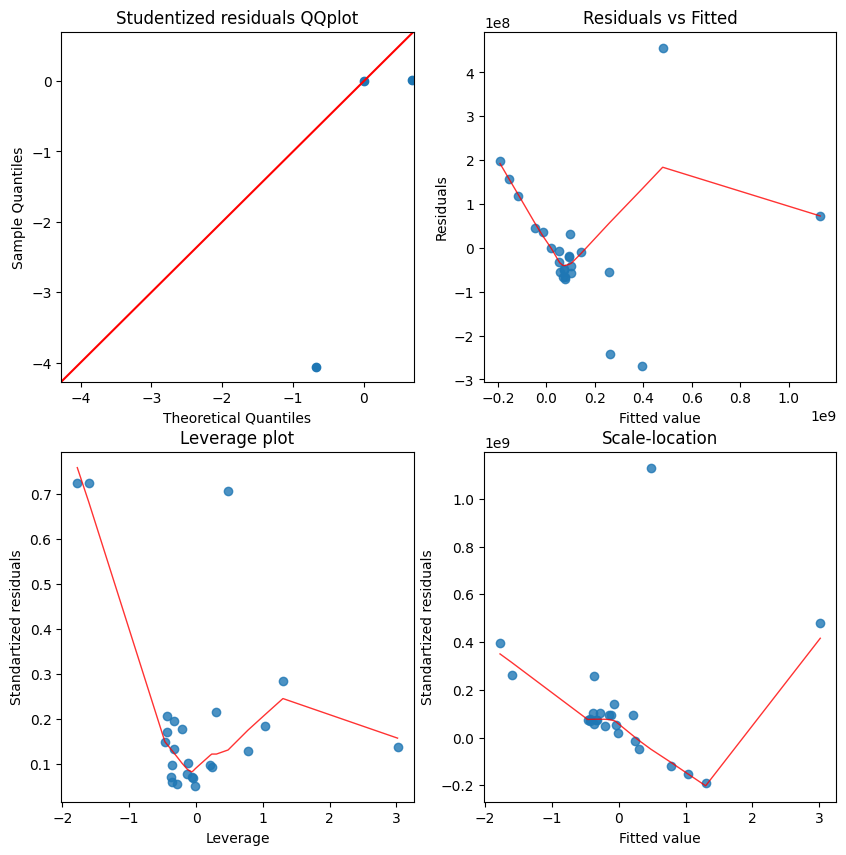

In [6]:
plt.rcParams["figure.figsize"] = (10, 10)
fig, ax = plt.subplots(nrows=2, ncols=2)


sm.qqplot(reg.outlier_test().T[0], line='45', ax=ax[0, 0])
ax[0, 0].set_title('Studentized residuals QQplot')


# Residuals vs Fitted
sns.regplot(x=fitted_value, y=residuals,
              scatter=True,
              lowess=True,
              line_kws={'color': 'red', 'lw': 1, 'alpha': 0.8},
              ax=ax[0, 1])
ax[0, 1].set_ylabel("Residuals")
ax[0, 1].set_xlabel("Fitted value")
ax[0, 1].set_title('Residuals vs Fitted')


sns.regplot(x=stand_resids, y=leverage,
              scatter=True,
              lowess=True,
              line_kws={'color': 'red', 'lw': 1, 'alpha': 0.8},
              ax=ax[1, 0])
ax[1, 0].set_ylabel("Standartized residuals")
ax[1, 0].set_xlabel("Leverage")
ax[1, 0].set_title('Leverage plot')

sns.regplot(x=stand_resids, y=fitted_value,
              scatter=True,
              lowess=True,
              line_kws={'color': 'red', 'lw': 1, 'alpha': 0.8},
              ax=ax[1, 1])
ax[1, 1].set_ylabel("Standartized residuals")
ax[1, 1].set_xlabel("Fitted value")
ax[1, 1].set_title('Scale-location')

In [11]:
df = df[stand_resids <= 0.6]

In [7]:
df[stand_resids > 0.6]

,Country,Area,Population,Life,GDP,GDP/caput
3,Brunei,5770,292266,71.24,4.4,16000
7,Hong.Kong,1040,5542869,80.18,136.1,24530
8,India,3287590,936545814,59.04,1253.9,1360
19,Singapore,633,2890468,76.16,57.0,19940


In [12]:
Y = df.Population

x = df[['Area', 'Life', 'GDP', 'GDP/caput']]
x = sm.add_constant(x)

reg = sm.OLS(Y, x).fit()


residuals = reg.resid
fitted_value = reg.fittedvalues
stand_resids = reg.resid_pearson
influence = reg.get_influence()
leverage = influence.hat_matrix_diag

In [13]:
reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             Population   R-squared:                       0.944
Model:                            OLS   Adj. R-squared:                  0.931
Method:                 Least Squares   F-statistic:                     67.99
Date:                Sat, 22 Apr 2023   Prob (F-statistic):           7.77e-10
Time:                        15:21:27   Log-Likelihood:                -405.61
No. Observations:                  21   AIC:                             821.2
Df Residuals:                      16   BIC:                             826.4
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -2.269e+08   1.47e+08     -1.540      0.143   -5.39e+08    8.54e+07
Area          47.4631      7.438      6.381      0.000      31.694      63.232
Life        4.961e+06   2.47e+06      2.008      0.062   -2.77e+05    1.02e+07
GDP         2.124e+05   2.46e+04      8.624      0.000     1.6e+05    2.65e+05
GDP/caput  -2.473e+04   3770.552     -6.560      0.000   -3.27e+04   -1.67e+04
==============================================================================
Omnibus:                        1.445   Durbin-Watson:                   2.408
Prob(Omnibus):                  0.486   Jarque-Bera (JB):                1.059
Skew:                           0.288   Prob(JB):                        0.589
Kurtosis:                       2.063   Cond. No.                     2.72e+07
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.72e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Text(0.5, 1.0, 'Scale-location')

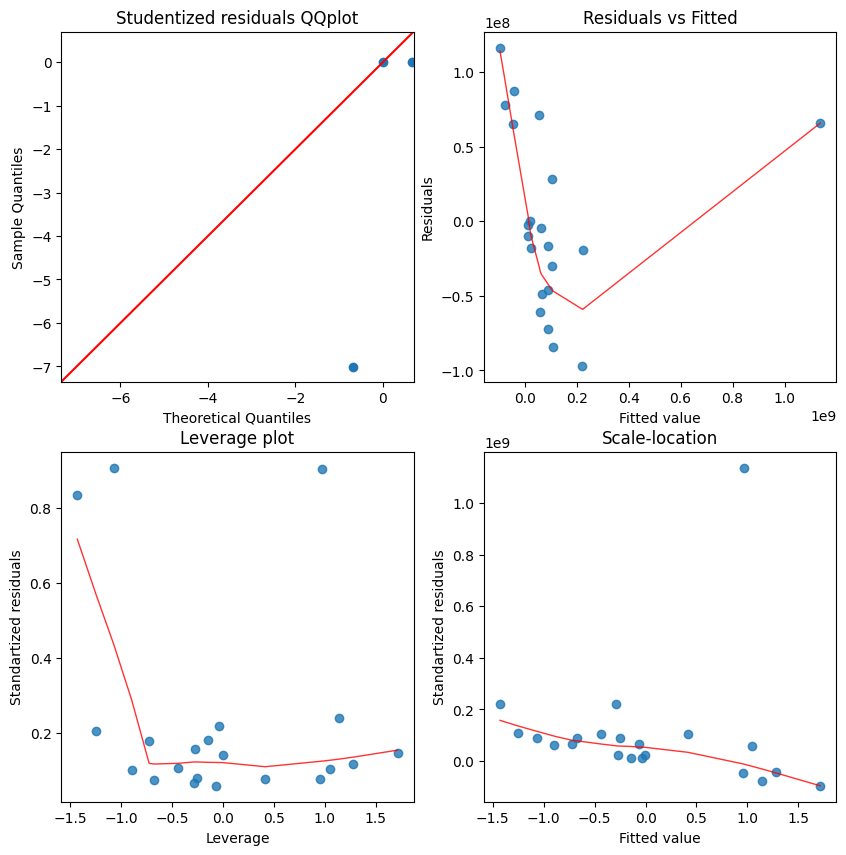

In [14]:
plt.rcParams["figure.figsize"] = (10, 10)
fig, ax = plt.subplots(nrows=2, ncols=2)


sm.qqplot(reg.outlier_test().T[0], line='45', ax=ax[0, 0])
ax[0, 0].set_title('Studentized residuals QQplot')


# Residuals vs Fitted
sns.regplot(x=fitted_value, y=residuals,
              scatter=True,
              lowess=True,
              line_kws={'color': 'red', 'lw': 1, 'alpha': 0.8},
              ax=ax[0, 1])
ax[0, 1].set_ylabel("Residuals")
ax[0, 1].set_xlabel("Fitted value")
ax[0, 1].set_title('Residuals vs Fitted')


sns.regplot(x=stand_resids, y=leverage,
              scatter=True,
              lowess=True,
              line_kws={'color': 'red', 'lw': 1, 'alpha': 0.8},
              ax=ax[1, 0])
ax[1, 0].set_ylabel("Standartized residuals")
ax[1, 0].set_xlabel("Leverage")
ax[1, 0].set_title('Leverage plot')

sns.regplot(x=stand_resids, y=fitted_value,
              scatter=True,
              lowess=True,
              line_kws={'color': 'red', 'lw': 1, 'alpha': 0.8},
              ax=ax[1, 1])
ax[1, 1].set_ylabel("Standartized residuals")
ax[1, 1].set_xlabel("Fitted value")
ax[1, 1].set_title('Scale-location')

In [80]:
df['Area_norm'] = st.boxcox(df.Area)[0]
df['Life_norm'] = st.boxcox(df.Life)[0]
df['GDP_norm'] = st.boxcox(df.GDP)[0]
df['caput_norm'] = st.boxcox(df['GDP/caput'])[0]
df['Population_norm'] = st.boxcox(df.Population)[0]


Y = df.Population_norm

x = df[['Area', 'Life', 'GDP', 'GDP/caput']]
x = sm.add_constant(x)

reg = sm.OLS(Y, x).fit()


residuals = reg.resid
fitted_value = reg.fittedvalues
stand_resids = reg.resid_pearson
influence = reg.get_influence()
leverage = influence.hat_matrix_diag

In [81]:
reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        Population_norm   R-squared:                       0.491
Model:                            OLS   Adj. R-squared:                  0.364
Method:                 Least Squares   F-statistic:                     3.864
Date:                Sun, 16 Apr 2023   Prob (F-statistic):             0.0221
Time:                        18:08:11   Log-Likelihood:                -73.766
No. Observations:                  21   AIC:                             157.5
Df Residuals:                      16   BIC:                             162.8
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         49.5253     20.209      2.451      0.026       6.684      92.366
Area        7.235e-07   1.02e-06      0.709      0.489   -1.44e-06    2.89e-06
Life          -0.0391      0.339     -0.115      0.910      -0.758       0.679
GDP            0.0095      0.003      2.797      0.013       0.002       0.017
GDP/caput     -0.0005      0.001     -0.891      0.386      -0.002       0.001
==============================================================================
Omnibus:                        3.852   Durbin-Watson:                   1.950
Prob(Omnibus):                  0.146   Jarque-Bera (JB):                2.625
Skew:                          -0.866   Prob(JB):                        0.269
Kurtosis:                       3.048   Cond. No.                     2.72e+07
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.72e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Text(0.5, 1.0, 'Scale-location')

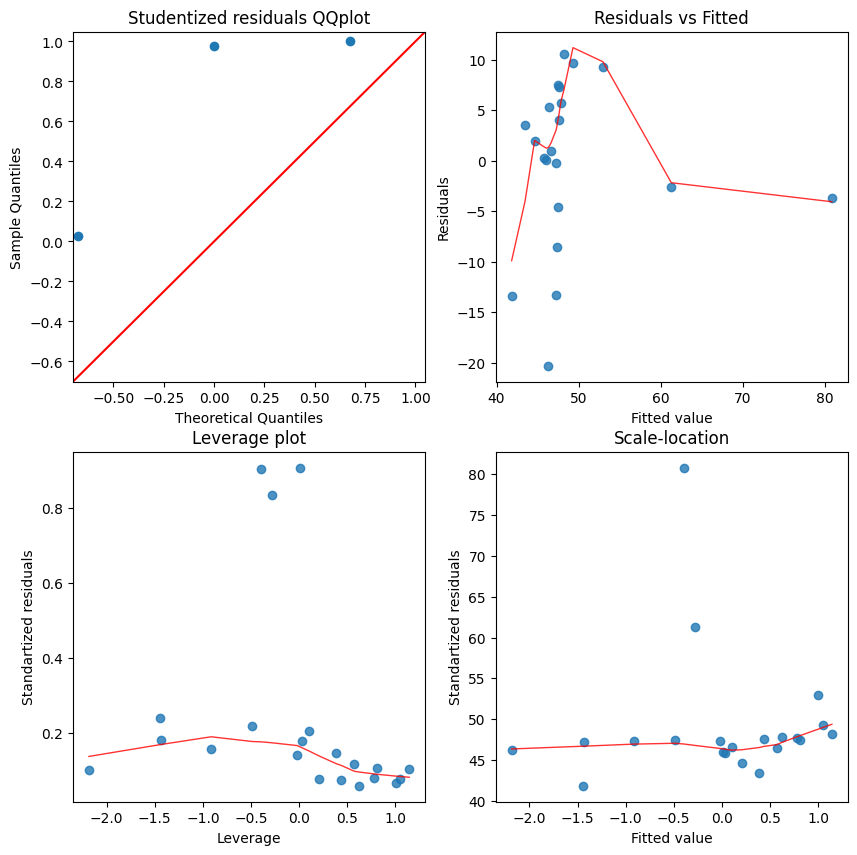

In [82]:
plt.rcParams["figure.figsize"] = (10, 10)
fig, ax = plt.subplots(nrows=2, ncols=2)


sm.qqplot(reg.outlier_test().T[0], line='45', ax=ax[0, 0])
ax[0, 0].set_title('Studentized residuals QQplot')


# Residuals vs Fitted
sns.regplot(x=fitted_value, y=residuals,
              scatter=True,
              lowess=True,
              line_kws={'color': 'red', 'lw': 1, 'alpha': 0.8},
              ax=ax[0, 1])
ax[0, 1].set_ylabel("Residuals")
ax[0, 1].set_xlabel("Fitted value")
ax[0, 1].set_title('Residuals vs Fitted')


sns.regplot(x=stand_resids, y=leverage,
              scatter=True,
              lowess=True,
              line_kws={'color': 'red', 'lw': 1, 'alpha': 0.8},
              ax=ax[1, 0])
ax[1, 0].set_ylabel("Standartized residuals")
ax[1, 0].set_xlabel("Leverage")
ax[1, 0].set_title('Leverage plot')

sns.regplot(x=stand_resids, y=fitted_value,
              scatter=True,
              lowess=True,
              line_kws={'color': 'red', 'lw': 1, 'alpha': 0.8},
              ax=ax[1, 1])
ax[1, 1].set_ylabel("Standartized residuals")
ax[1, 1].set_xlabel("Fitted value")
ax[1, 1].set_title('Scale-location')

In [83]:
reg.params

const        4.952527e+01
Area         7.234665e-07
Life        -3.909855e-02
GDP          9.451787e-03
GDP/caput   -4.607940e-04
dtype: float64

In [153]:
df = pd.read_csv('./datasets/Asia.txt', sep='\t')
df.head()

df['Area_norm'] = st.boxcox(df.Area)[0]
df['Life_norm'] = st.boxcox(df.Life)[0]
df['GDP_norm'] = st.boxcox(df.GDP)[0]
df['caput_norm'] = st.boxcox(df['GDP/caput'])[0]
df['Population_norm'] = st.boxcox(df.Population)[0]

In [154]:
Y = st.boxcox(df.Population)[0]

x = normalize(df[['Area', 'Life', 'GDP', 'GDP/caput']])
x = sm.add_constant(x)

reg = sm.OLS(Y, x).fit()


residuals = reg.resid
fitted_value = reg.fittedvalues
stand_resids = reg.resid_pearson
influence = reg.get_influence()
leverage = influence.hat_matrix_diag

In [155]:
reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.568
Model:                            OLS   Adj. R-squared:                  0.481
Method:                 Least Squares   F-statistic:                     6.569
Date:                Sun, 16 Apr 2023   Prob (F-statistic):            0.00152
Time:                        18:15:00   Log-Likelihood:                -70.320
No. Observations:                  25   AIC:                             150.6
Df Residuals:                      20   BIC:                             156.7
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         50.0155     14.952      3.345      0.003      18.826      81.205
x1           -17.7075     14.795     -1.197      0.245     -48.569      13.154
x2           -28.9921    142.234     -0.204      0.841    -325.687     267.703
x3           799.4184    495.132      1.615      0.122    -233.409    1832.246
x4           -27.7508     14.451     -1.920      0.069     -57.894       2.393
==============================================================================
Omnibus:                        5.562   Durbin-Watson:                   2.041
Prob(Omnibus):                  0.062   Jarque-Bera (JB):                3.650
Skew:                           0.672   Prob(JB):                        0.161
Kurtosis:                       4.303   Cond. No.                         732.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Text(0.5, 1.0, 'Scale-location')

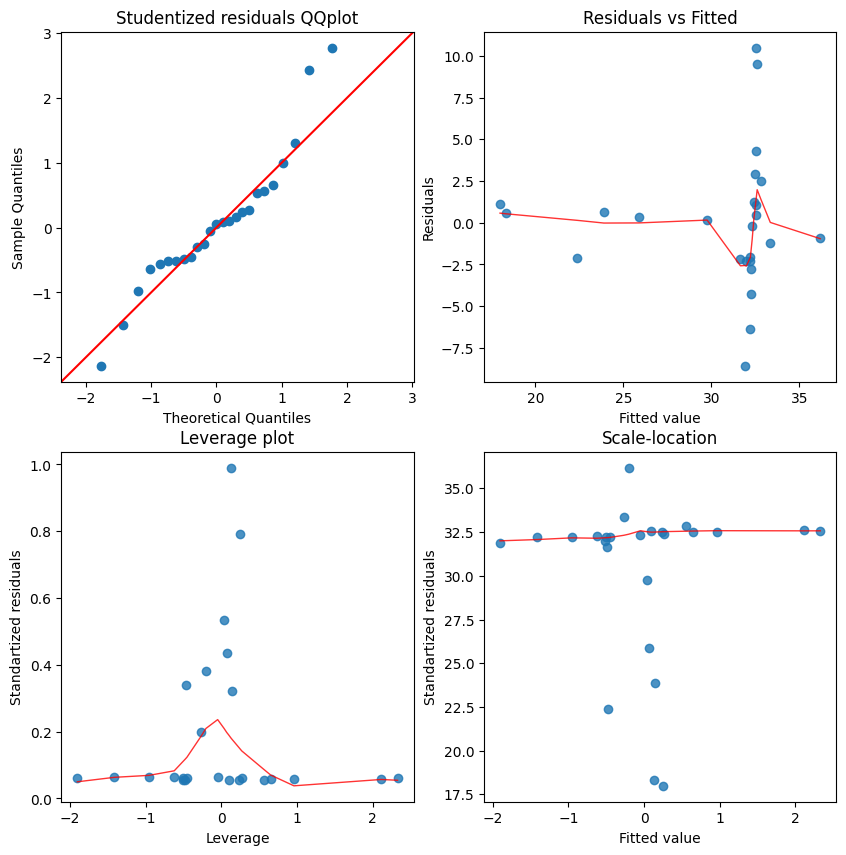

In [156]:
plt.rcParams["figure.figsize"] = (10, 10)
fig, ax = plt.subplots(nrows=2, ncols=2)


sm.qqplot(reg.outlier_test().T[0], line='45', ax=ax[0, 0])
ax[0, 0].set_title('Studentized residuals QQplot')


# Residuals vs Fitted
sns.regplot(x=fitted_value, y=residuals,
              scatter=True,
              lowess=True,
              line_kws={'color': 'red', 'lw': 1, 'alpha': 0.8},
              ax=ax[0, 1])
ax[0, 1].set_ylabel("Residuals")
ax[0, 1].set_xlabel("Fitted value")
ax[0, 1].set_title('Residuals vs Fitted')


sns.regplot(x=stand_resids, y=leverage,
              scatter=True,
              lowess=True,
              line_kws={'color': 'red', 'lw': 1, 'alpha': 0.8},
              ax=ax[1, 0])
ax[1, 0].set_ylabel("Standartized residuals")
ax[1, 0].set_xlabel("Leverage")
ax[1, 0].set_title('Leverage plot')

sns.regplot(x=stand_resids, y=fitted_value,
              scatter=True,
              lowess=True,
              line_kws={'color': 'red', 'lw': 1, 'alpha': 0.8},
              ax=ax[1, 1])
ax[1, 1].set_ylabel("Standartized residuals")
ax[1, 1].set_xlabel("Fitted value")
ax[1, 1].set_title('Scale-location')

In [157]:
df = df[stand_resids <= 0.6]
Y = st.boxcox(df.Population)[0]

x = normalize(df[['Area', 'Life', 'GDP', 'caput_norm']])
x = sm.add_constant(x)

reg = sm.OLS(Y, x).fit()


residuals = reg.resid
fitted_value = reg.fittedvalues
stand_resids = reg.resid_pearson
influence = reg.get_influence()
leverage = influence.hat_matrix_diag

In [158]:
reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.444
Model:                            OLS   Adj. R-squared:                  0.305
Method:                 Least Squares   F-statistic:                     3.199
Date:                Sun, 16 Apr 2023   Prob (F-statistic):             0.0414
Time:                        18:15:00   Log-Likelihood:                -113.61
No. Observations:                  21   AIC:                             237.2
Df Residuals:                      16   BIC:                             242.4
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -1.432e+04   1.36e+04     -1.050      0.310   -4.33e+04    1.46e+04
x1          1.455e+04   1.37e+04      1.066      0.302   -1.44e+04    4.35e+04
x2          1.248e+05   1.11e+05      1.120      0.279   -1.11e+05    3.61e+05
x3         -4025.4361   3561.369     -1.130      0.275   -1.16e+04    3524.329
x4         -1.962e+06   1.74e+06     -1.127      0.276   -5.65e+06    1.73e+06
==============================================================================
Omnibus:                        0.176   Durbin-Watson:                   2.368
Prob(Omnibus):                  0.916   Jarque-Bera (JB):                0.285
Skew:                           0.184   Prob(JB):                        0.867
Kurtosis:                       2.564   Cond. No.                     1.79e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.79e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Text(0.5, 1.0, 'Scale-location')

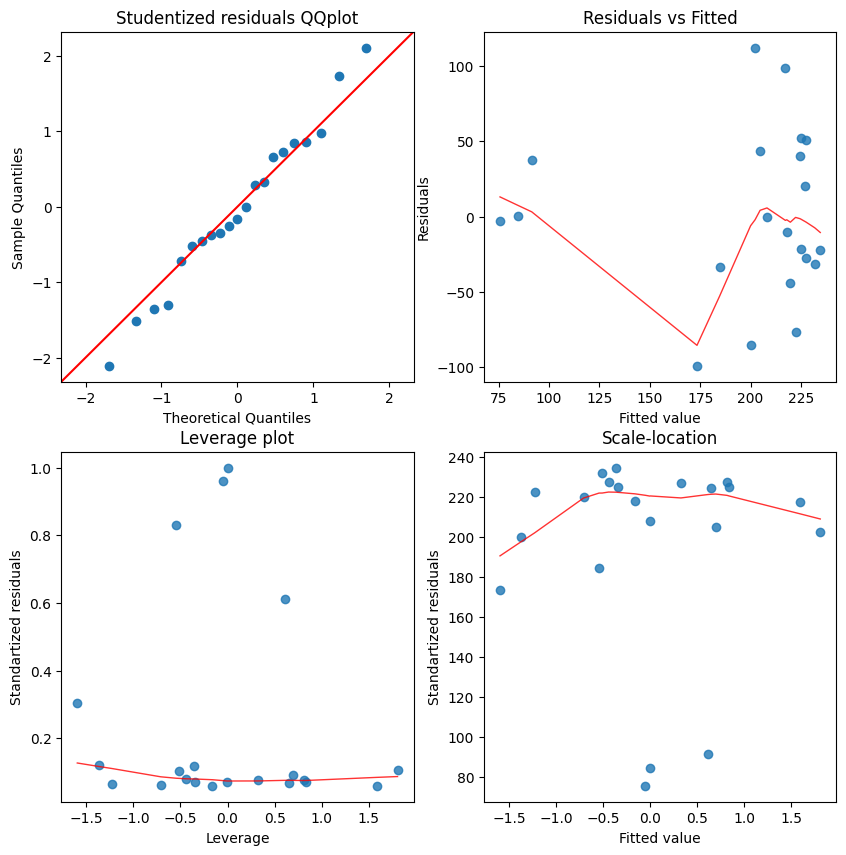

In [159]:
plt.rcParams["figure.figsize"] = (10, 10)
fig, ax = plt.subplots(nrows=2, ncols=2)


sm.qqplot(reg.outlier_test().T[0], line='45', ax=ax[0, 0])
ax[0, 0].set_title('Studentized residuals QQplot')


# Residuals vs Fitted
sns.regplot(x=fitted_value, y=residuals,
              scatter=True,
              lowess=True,
              line_kws={'color': 'red', 'lw': 1, 'alpha': 0.8},
              ax=ax[0, 1])
ax[0, 1].set_ylabel("Residuals")
ax[0, 1].set_xlabel("Fitted value")
ax[0, 1].set_title('Residuals vs Fitted')


sns.regplot(x=stand_resids, y=leverage,
              scatter=True,
              lowess=True,
              line_kws={'color': 'red', 'lw': 1, 'alpha': 0.8},
              ax=ax[1, 0])
ax[1, 0].set_ylabel("Standartized residuals")
ax[1, 0].set_xlabel("Leverage")
ax[1, 0].set_title('Leverage plot')

sns.regplot(x=stand_resids, y=fitted_value,
              scatter=True,
              lowess=True,
              line_kws={'color': 'red', 'lw': 1, 'alpha': 0.8},
              ax=ax[1, 1])
ax[1, 1].set_ylabel("Standartized residuals")
ax[1, 1].set_xlabel("Fitted value")
ax[1, 1].set_title('Scale-location')

## Перебрать lamb по решетке, построить модель так.

In [28]:
df = pd.read_csv('./datasets/Asia.txt', sep='\t')
df.head()

,Country,Area,Population,Life,GDP,GDP/caput
0,Australia,7686850,18322231,77.78,374.6,20720
1,Bangladesh,144000,128094948,55.46,130.1,1040
2,Bhutan,47000,1780638,51.03,1.2,700
3,Brunei,5770,292266,71.24,4.4,16000
4,Burma(Myanma),678500,45103809,60.47,41.4,930


In [29]:
bad = ['Bangladesh', 'Brunei', 'India', 'Japan', 'Maldives', 'Philippines']
df = df[~df.Country.isin(bad)]

In [30]:
lamb = np.arange(0, 2.1, 0.1)

res = []

for el in tqdm(it.product(lamb, lamb, lamb, lamb, lamb), total=len(lamb)**5):
    Y = st.boxcox(df.Population, el[4])
    x = np.stack([st.boxcox(df['Area'], el[0]), st.boxcox(df['Life'], el[1]), \
                st.boxcox(df['GDP'], el[2]), st.boxcox(df['GDP/caput'], el[3])], axis=1)
    x = sm.add_constant(x)

    reg = sm.OLS(Y, x).fit()
    res.append(np.sum(reg.resid**2))

100%|██████████| 4084101/4084101 [06:40<00:00, 10194.19it/s]


In [31]:
good_l = np.array(list(it.product(lamb, lamb, lamb, lamb, lamb)))[np.array(res) == np.min(res)][0]

In [32]:
good_l

array([0.2, 2. , 0. , 0. , 0. ])

In [33]:
Y = st.boxcox(df.Population, good_l[4])
x = np.stack([st.boxcox(df['Area'], good_l[0]), st.boxcox(df['Life'], good_l[1]), \
                st.boxcox(df['GDP'], good_l[2]), st.boxcox(df['GDP/caput'], good_l[3])], axis=1)
x = sm.add_constant(x)

reg = sm.OLS(Y, x).fit()

residuals = reg.resid
fitted_value = reg.fittedvalues
stand_resids = reg.resid_pearson
influence = reg.get_influence()
leverage = influence.hat_matrix_diag

In [34]:
reg.summary()

/opt/homebrew/lib/python3.10/site-packages/scipy/stats/_stats_py.py:1736: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=19
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 5.464e+05
Date:                Thu, 04 May 2023   Prob (F-statistic):           3.54e-36
Time:                        12:26:14   Log-Likelihood:                 76.142
No. Observations:                  19   AIC:                            -142.3
Df Residuals:                      14   BIC:                            -137.6
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         20.7483      0.011   1814.174      0.000      20.724      20.773
x1             0.0001   6.43e-05      1.724      0.107    -2.7e-05       0.000
x2         -9.777e-06   3.77e-06     -2.595      0.021   -1.79e-05    -1.7e-06
x3             0.9960      0.001    938.321      0.000       0.994       0.998
x4            -0.9969      0.002   -479.029      0.000      -1.001      -0.992
==============================================================================
Omnibus:                        0.439   Durbin-Watson:                   2.591
Prob(Omnibus):                  0.803   Jarque-Bera (JB):                0.526
Skew:                          -0.289   Prob(JB):                        0.769
Kurtosis:                       2.425   Cond. No.                     2.30e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.3e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Text(0.5, 1.0, 'Scale-location')

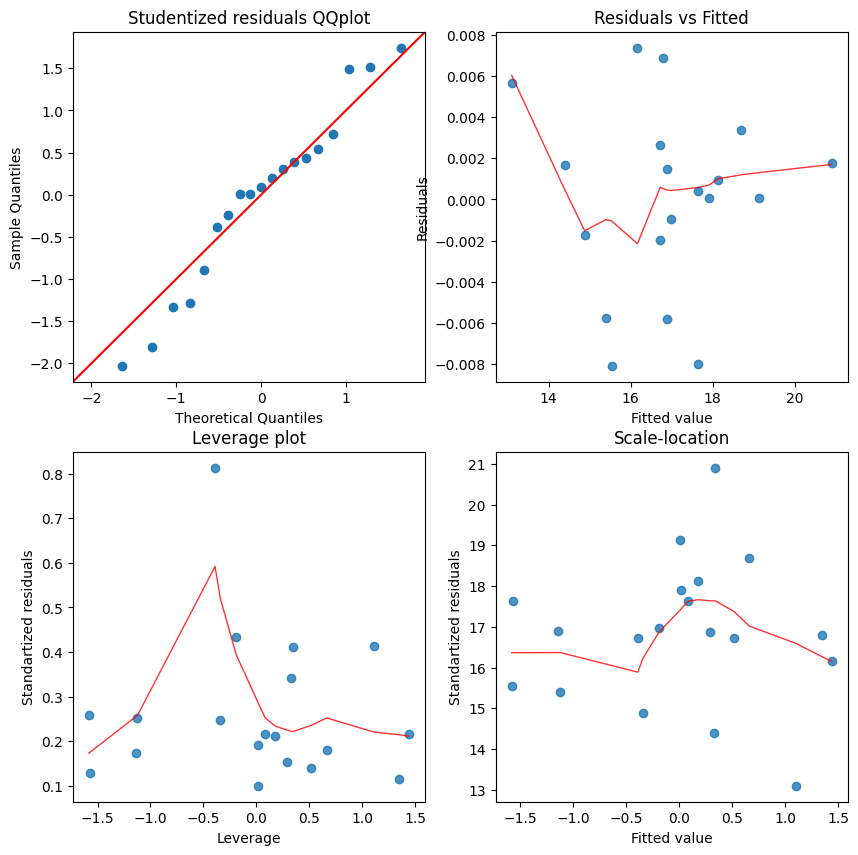

In [35]:
plt.rcParams["figure.figsize"] = (10, 10)
fig, ax = plt.subplots(nrows=2, ncols=2)


sm.qqplot(reg.outlier_test().T[0], line='45', ax=ax[0, 0])
ax[0, 0].set_title('Studentized residuals QQplot')


# Residuals vs Fitted
sns.regplot(x=fitted_value, y=residuals,
              scatter=True,
              lowess=True,
              line_kws={'color': 'red', 'lw': 1, 'alpha': 0.8},
              ax=ax[0, 1])
ax[0, 1].set_ylabel("Residuals")
ax[0, 1].set_xlabel("Fitted value")
ax[0, 1].set_title('Residuals vs Fitted')


sns.regplot(x=stand_resids, y=leverage,
              scatter=True,
              lowess=True,
              line_kws={'color': 'red', 'lw': 1, 'alpha': 0.8},
              ax=ax[1, 0])
ax[1, 0].set_ylabel("Standartized residuals")
ax[1, 0].set_xlabel("Leverage")
ax[1, 0].set_title('Leverage plot')

sns.regplot(x=stand_resids, y=fitted_value,
              scatter=True,
              lowess=True,
              line_kws={'color': 'red', 'lw': 1, 'alpha': 0.8},
              ax=ax[1, 1])
ax[1, 1].set_ylabel("Standartized residuals")
ax[1, 1].set_xlabel("Fitted value")
ax[1, 1].set_title('Scale-location')

In [37]:
sum(reg.resid**2)

0.00036765201730655983

In [27]:
df[stand_resids >= 0.3].Country.to_numpy()

array(['Bangladesh', 'Brunei', 'India', 'Japan', 'Maldives',
       'Philippines'], dtype=object)

# Task 3

In [21]:
df = pd.read_csv('./datasets/landrent.txt', sep='\t')
df.head()

,Rent,AllRent,Cows,Pasture,Liming
0,18.38,15.50,17.25,0.24,No
1,20.00,22.29,18.51,0.20,Yes
2,11.50,12.36,11.13,0.12,No
3,25.00,31.84,5.54,0.12,Yes
4,52.50,83.90,5.44,0.04,No


In [22]:
x = df[['Cows', 'Pasture']]
x = sm.add_constant(x)

Y = df.Rent
reg = sm.OLS(Y, x).fit()


residuals = reg.resid
fitted_value = reg.fittedvalues
stand_resids = reg.resid_pearson
influence = reg.get_influence()
leverage = influence.hat_matrix_diag

reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   Rent   R-squared:                       0.418
Model:                            OLS   Adj. R-squared:                  0.400
Method:                 Least Squares   F-statistic:                     23.01
Date:                Sun, 16 Apr 2023   Prob (F-statistic):           2.95e-08
Time:                        18:21:18   Log-Likelihood:                -285.28
No. Observations:                  67   AIC:                             576.6
Df Residuals:                      64   BIC:                             583.2
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         39.9550      3.786     10.553      0.000      32.391      47.519
Cows           0.9676      0.165      5.876      0.000       0.639       1.297
Pasture     -104.2188     17.479     -5.963      0.000    -139.137     -69.301
==============================================================================
Omnibus:                        0.994   Durbin-Watson:                   1.873
Prob(Omnibus):                  0.608   Jarque-Bera (JB):                0.899
Skew:                           0.276   Prob(JB):                        0.638
Kurtosis:                       2.864   Cond. No.                         210.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Text(0.5, 1.0, 'Scale-location')

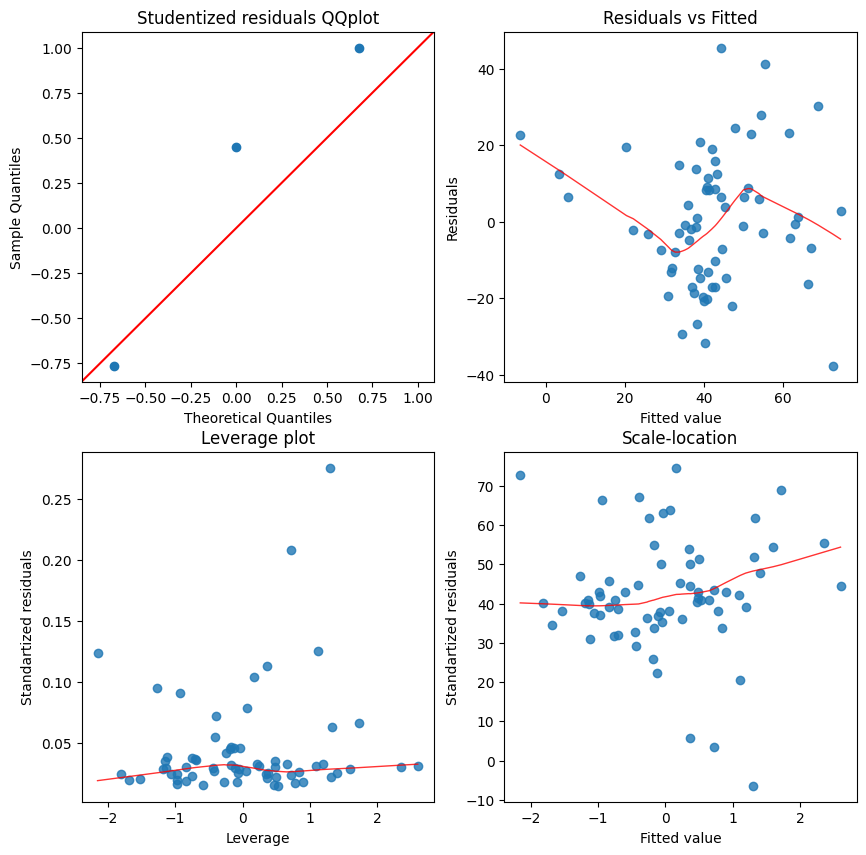

In [23]:
plt.rcParams["figure.figsize"] = (10, 10)
fig, ax = plt.subplots(nrows=2, ncols=2)


sm.qqplot(reg.outlier_test().T[0], line='45', ax=ax[0, 0])
ax[0, 0].set_title('Studentized residuals QQplot')


# Residuals vs Fitted
sns.regplot(x=fitted_value, y=residuals,
              scatter=True,
              lowess=True,
              line_kws={'color': 'red', 'lw': 1, 'alpha': 0.8},
              ax=ax[0, 1])
ax[0, 1].set_ylabel("Residuals")
ax[0, 1].set_xlabel("Fitted value")
ax[0, 1].set_title('Residuals vs Fitted')


sns.regplot(x=stand_resids, y=leverage,
              scatter=True,
              lowess=True,
              line_kws={'color': 'red', 'lw': 1, 'alpha': 0.8},
              ax=ax[1, 0])
ax[1, 0].set_ylabel("Standartized residuals")
ax[1, 0].set_xlabel("Leverage")
ax[1, 0].set_title('Leverage plot')

sns.regplot(x=stand_resids, y=fitted_value,
              scatter=True,
              lowess=True,
              line_kws={'color': 'red', 'lw': 1, 'alpha': 0.8},
              ax=ax[1, 1])
ax[1, 1].set_ylabel("Standartized residuals")
ax[1, 1].set_xlabel("Fitted value")
ax[1, 1].set_title('Scale-location')

In [17]:
df1 = df[df.Liming=='Yes'].reset_index()
x = df1[['Cows', 'Pasture']]
x = sm.add_constant(x)

Y = df1.Rent
reg = sm.OLS(Y, x).fit()


residuals = reg.resid
fitted_value = reg.fittedvalues
stand_resids = reg.resid_pearson
influence = reg.get_influence()
leverage = influence.hat_matrix_diag

reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   Rent   R-squared:                       0.504
Model:                            OLS   Adj. R-squared:                  0.471
Method:                 Least Squares   F-statistic:                     15.25
Date:                Sun, 16 Apr 2023   Prob (F-statistic):           2.70e-05
Time:                        18:20:00   Log-Likelihood:                -133.57
No. Observations:                  33   AIC:                             273.1
Df Residuals:                      30   BIC:                             277.6
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         45.0709      4.924      9.154      0.000      35.015      55.127
Cows           2.1108      0.389      5.419      0.000       1.315       2.906
Pasture     -272.4281     57.919     -4.704      0.000    -390.714    -154.142
==============================================================================
Omnibus:                        0.667   Durbin-Watson:                   2.186
Prob(Omnibus):                  0.716   Jarque-Bera (JB):                0.514
Skew:                           0.292   Prob(JB):                        0.773
Kurtosis:                       2.820   Cond. No.                         344.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Text(0.5, 1.0, 'Scale-location')

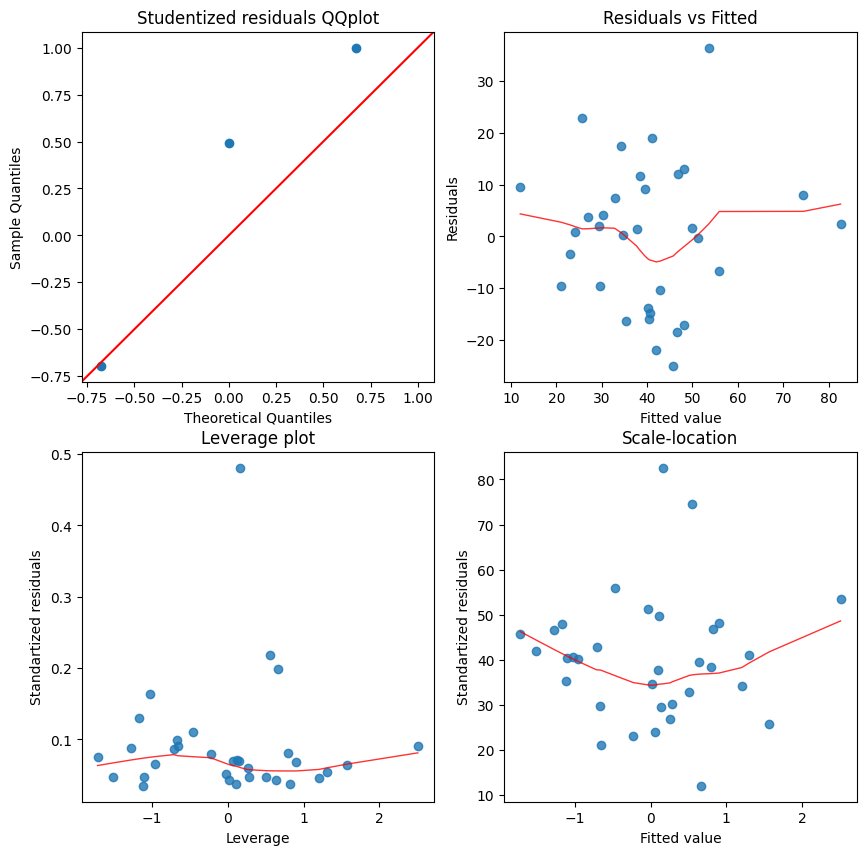

In [18]:
plt.rcParams["figure.figsize"] = (10, 10)
fig, ax = plt.subplots(nrows=2, ncols=2)


sm.qqplot(reg.outlier_test().T[0], line='45', ax=ax[0, 0])
ax[0, 0].set_title('Studentized residuals QQplot')


# Residuals vs Fitted
sns.regplot(x=fitted_value, y=residuals,
              scatter=True,
              lowess=True,
              line_kws={'color': 'red', 'lw': 1, 'alpha': 0.8},
              ax=ax[0, 1])
ax[0, 1].set_ylabel("Residuals")
ax[0, 1].set_xlabel("Fitted value")
ax[0, 1].set_title('Residuals vs Fitted')


sns.regplot(x=stand_resids, y=leverage,
              scatter=True,
              lowess=True,
              line_kws={'color': 'red', 'lw': 1, 'alpha': 0.8},
              ax=ax[1, 0])
ax[1, 0].set_ylabel("Standartized residuals")
ax[1, 0].set_xlabel("Leverage")
ax[1, 0].set_title('Leverage plot')

sns.regplot(x=stand_resids, y=fitted_value,
              scatter=True,
              lowess=True,
              line_kws={'color': 'red', 'lw': 1, 'alpha': 0.8},
              ax=ax[1, 1])
ax[1, 1].set_ylabel("Standartized residuals")
ax[1, 1].set_xlabel("Fitted value")
ax[1, 1].set_title('Scale-location')

In [19]:
df1 = df[df.Liming=='No'].reset_index()
x = df1[['Cows', 'Pasture']]
x = sm.add_constant(x)

Y = df1.Rent
reg = sm.OLS(Y, x).fit()


residuals = reg.resid
fitted_value = reg.fittedvalues
stand_resids = reg.resid_pearson
influence = reg.get_influence()
leverage = influence.hat_matrix_diag

reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   Rent   R-squared:                       0.468
Model:                            OLS   Adj. R-squared:                  0.434
Method:                 Least Squares   F-statistic:                     13.63
Date:                Sun, 16 Apr 2023   Prob (F-statistic):           5.66e-05
Time:                        18:20:24   Log-Likelihood:                -146.45
No. Observations:                  34   AIC:                             298.9
Df Residuals:                      31   BIC:                             303.5
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         41.6732      7.685      5.423      0.000      26.000      57.346
Cows           0.8178      0.232      3.524      0.001       0.345       1.291
Pasture      -93.5340     19.801     -4.724      0.000    -133.918     -53.150
==============================================================================
Omnibus:                        0.020   Durbin-Watson:                   2.099
Prob(Omnibus):                  0.990   Jarque-Bera (JB):                0.076
Skew:                           0.016   Prob(JB):                        0.963
Kurtosis:                       2.770   Cond. No.                         203.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Text(0.5, 1.0, 'Scale-location')

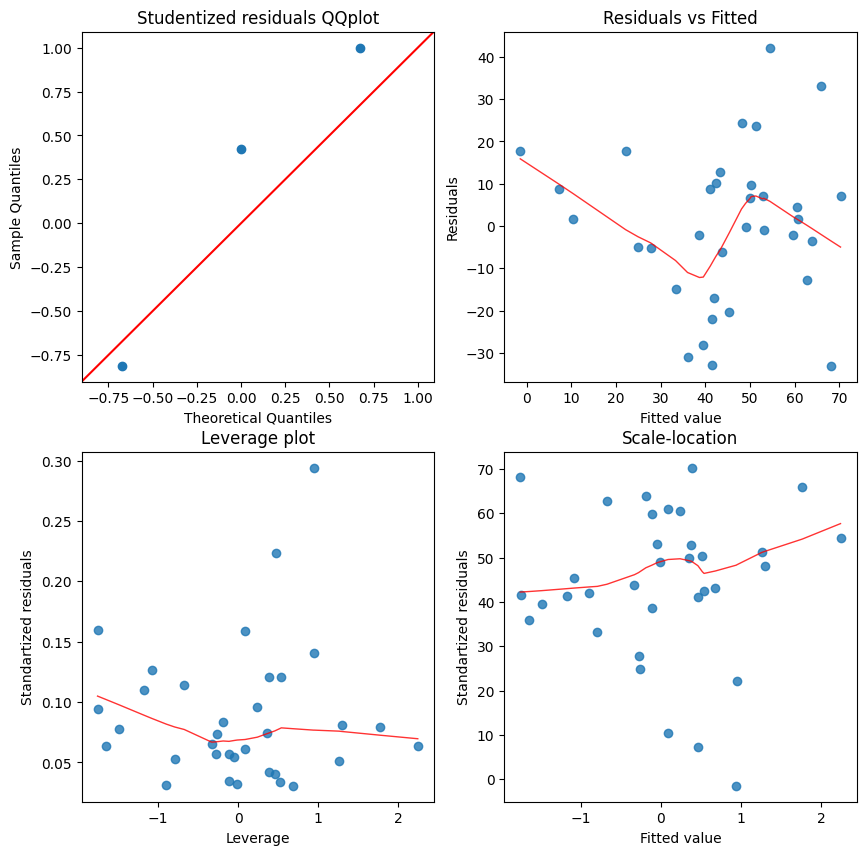

In [20]:
plt.rcParams["figure.figsize"] = (10, 10)
fig, ax = plt.subplots(nrows=2, ncols=2)


sm.qqplot(reg.outlier_test().T[0], line='45', ax=ax[0, 0])
ax[0, 0].set_title('Studentized residuals QQplot')


# Residuals vs Fitted
sns.regplot(x=fitted_value, y=residuals,
              scatter=True,
              lowess=True,
              line_kws={'color': 'red', 'lw': 1, 'alpha': 0.8},
              ax=ax[0, 1])
ax[0, 1].set_ylabel("Residuals")
ax[0, 1].set_xlabel("Fitted value")
ax[0, 1].set_title('Residuals vs Fitted')


sns.regplot(x=stand_resids, y=leverage,
              scatter=True,
              lowess=True,
              line_kws={'color': 'red', 'lw': 1, 'alpha': 0.8},
              ax=ax[1, 0])
ax[1, 0].set_ylabel("Standartized residuals")
ax[1, 0].set_xlabel("Leverage")
ax[1, 0].set_title('Leverage plot')

sns.regplot(x=stand_resids, y=fitted_value,
              scatter=True,
              lowess=True,
              line_kws={'color': 'red', 'lw': 1, 'alpha': 0.8},
              ax=ax[1, 1])
ax[1, 1].set_ylabel("Standartized residuals")
ax[1, 1].set_xlabel("Fitted value")
ax[1, 1].set_title('Scale-location')